In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Complete Model

In [3]:
df = pd.read_csv('Testing/test.csv')
df.head()

,Ground Truth,Language,Comments,Prediction
0,Positive,English,Love that he drives it. You can tell that's no...,Positive
1,Positive,English,Nice!!!!!,Positive
2,Positive,English,SAM Bahadur superb... everyone must watch this...,Positive
3,Positive,English,Sam Bahadur,Neutral
4,Positive,English,So beautiful pics and superb photo,Positive


In [4]:
true_labels = df["Ground Truth"]
predicted_labels = df["Prediction"]

In [5]:
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.84


In [6]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

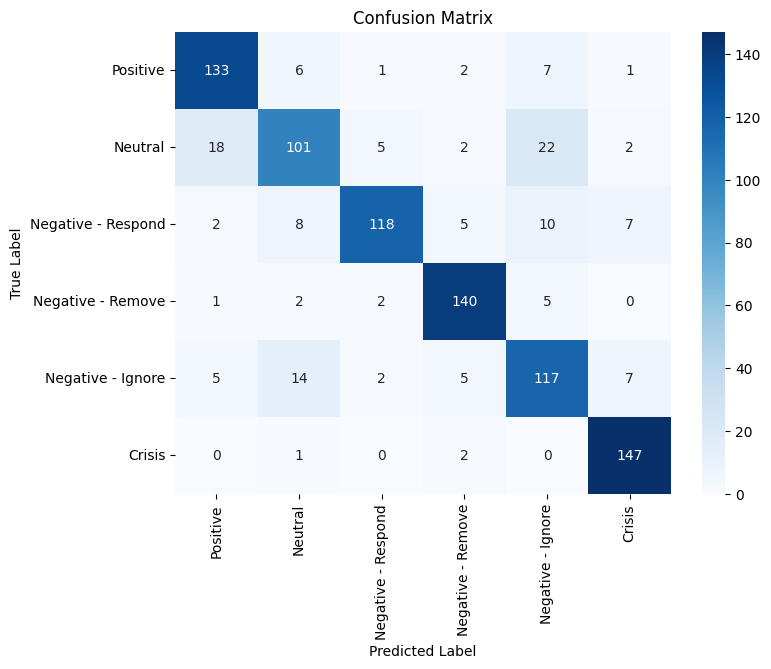

In [7]:
label_names = ["Positive", "Neutral", "Negative - Respond", "Negative - Remove", "Negative - Ignore", "Crisis"]

conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=label_names)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# English

In [8]:
df_eng = df[df["Language"] == "English"]
true_labels_eng = df_eng["Ground Truth"]
predicted_labels_eng = df_eng["Prediction"]

In [9]:
accuracy_eng = accuracy_score(true_labels_eng, predicted_labels_eng)
print("Accuracy English:", accuracy_eng)

Accuracy English: 0.86


In [10]:
conf_matrix_eng = confusion_matrix(true_labels_eng, predicted_labels_eng)

Text(0.5, 1.0, 'Confusion Matrix English')

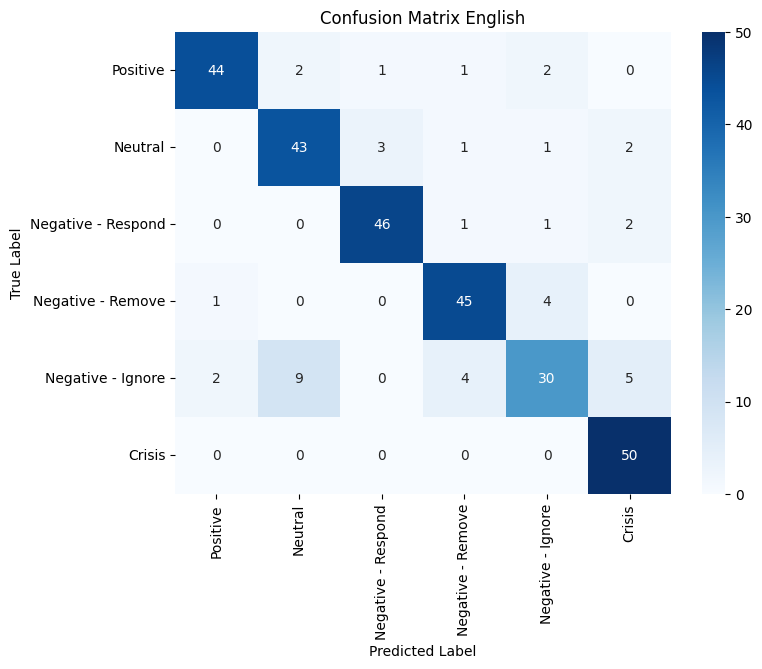

In [11]:
label_names_eng = ["Positive", "Neutral", "Negative - Respond", "Negative - Remove", "Negative - Ignore", "Crisis"]

conf_matrix_eng = confusion_matrix(true_labels_eng, predicted_labels_eng, labels=label_names_eng)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_eng, annot=True, fmt="d", cmap="Blues", xticklabels=label_names_eng, yticklabels=label_names_eng)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix English")

# Urdu (Roman Script)

In [12]:
df_ru = df[df["Language"] == "Roman Urdu"]
true_labels_ru = df_ru["Ground Truth"]
predicted_labels_ru = df_ru["Prediction"]


In [13]:
accuracy_ru = accuracy_score(true_labels_ru, predicted_labels_ru)
print("Accuracy Urdu (Roman Script):", accuracy_ru)

Accuracy Urdu (Roman Script): 0.8066666666666666


In [14]:
conf_matrix_ru = confusion_matrix(true_labels_ru, predicted_labels_ru)

Text(0.5, 1.0, 'Confusion Matrix Urdu (Roman Script)')

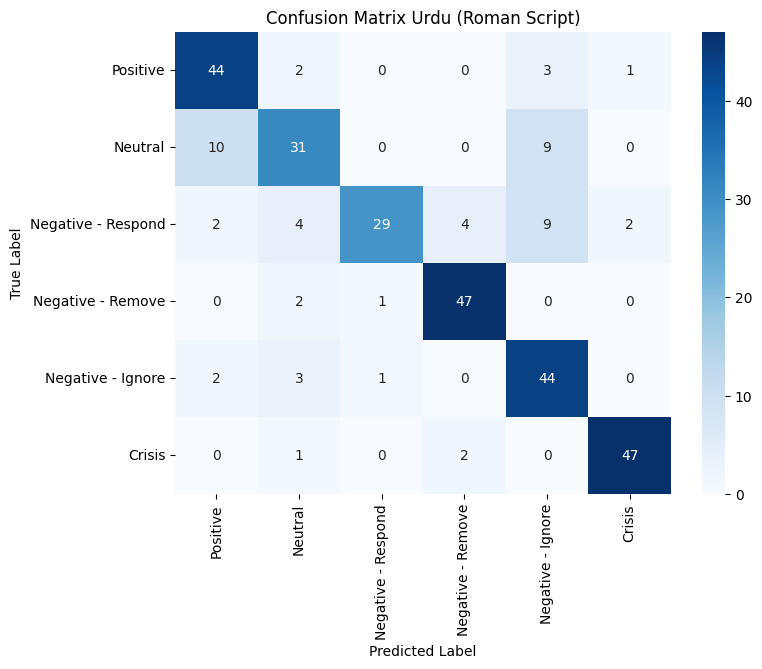

In [15]:
label_names_ru = ["Positive", "Neutral", "Negative - Respond", "Negative - Remove", "Negative - Ignore", "Crisis"]

conf_matrix_ru = confusion_matrix(true_labels_ru, predicted_labels_ru, labels=label_names_ru)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ru, annot=True, fmt="d", cmap="Blues", xticklabels=label_names_ru, yticklabels=label_names_ru)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Urdu (Roman Script)")

# Urdu (Arabic Script)

In [16]:
df_urdu = df[df["Language"] == "Urdu"]
true_labels_urdu = df_urdu["Ground Truth"]
predicted_labels_urdu = df_urdu["Prediction"]

In [17]:
accuracy_urdu = accuracy_score(true_labels_urdu, predicted_labels_urdu)
print("Accuracy Urdu(Arabic Script):", accuracy_urdu)

Accuracy Urdu(Arabic Script): 0.8533333333333334


In [18]:
conf_matrix_urdu = confusion_matrix(true_labels_urdu, predicted_labels_urdu)

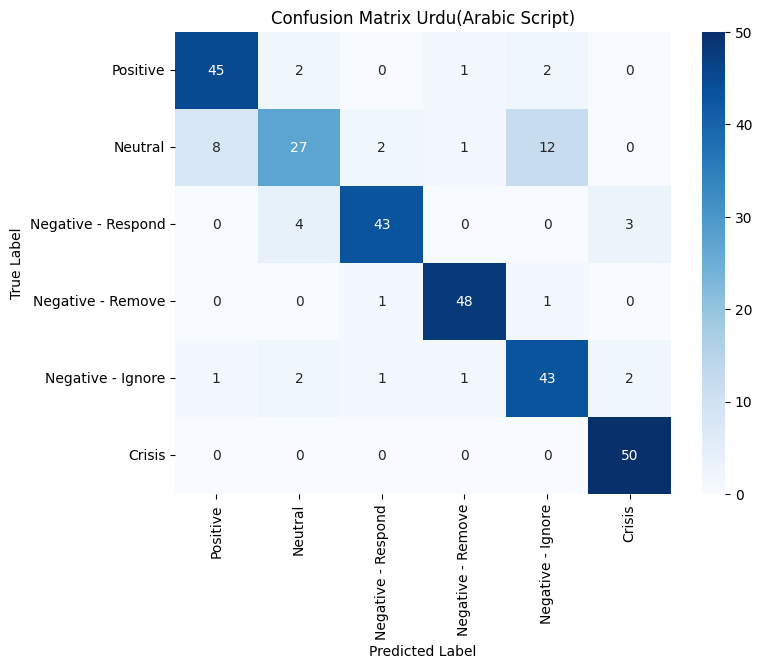

In [19]:
label_names_urdu = ["Positive", "Neutral", "Negative - Respond", "Negative - Remove", "Negative - Ignore", "Crisis"]

conf_matrix_urdu = confusion_matrix(true_labels_urdu, predicted_labels_urdu, labels=label_names_urdu)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_urdu, annot=True, fmt="d", cmap="Blues", xticklabels=label_names_urdu, yticklabels=label_names_urdu)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Urdu(Arabic Script)")
plt.show()

# Accuracy of each label on each language

In [20]:
df_accuracy = pd.DataFrame(columns=label_names, dtype=float)

df_accuracy.loc["English"] = [0.0] * len(label_names)
df_accuracy.loc["Roman Urdu"] = [0.0] * len(label_names)
df_accuracy.loc["Urdu"] = [0.0] * len(label_names)

for label in label_names:
    df_accuracy.loc["English", label] = accuracy_score(df_eng[df_eng["Ground Truth"] == label]["Ground Truth"],
                                                   df_eng[df_eng["Ground Truth"] == label]["Prediction"])
    df_accuracy.loc["Roman Urdu", label] = accuracy_score(df_ru[df_ru["Ground Truth"] == label]["Ground Truth"],
                                                      df_ru[df_ru["Ground Truth"] == label]["Prediction"])
    df_accuracy.loc["Urdu", label] = accuracy_score(df_urdu[df_urdu["Ground Truth"] == label]["Ground Truth"],
                                               df_urdu[df_urdu["Ground Truth"] == label]["Prediction"])

print(df_accuracy)


            Positive  Neutral  Negative - Respond  Negative - Remove  \
English         0.88     0.86                0.92               0.90   
Roman Urdu      0.88     0.62                0.58               0.94   
Urdu            0.90     0.54                0.86               0.96   

            Negative - Ignore  Crisis  
English                  0.60    1.00  
Roman Urdu               0.88    0.94  
Urdu                     0.86    1.00  


In [23]:
# table for overall accracy of each label

df_accuracy = pd.DataFrame(columns=label_names, dtype=float)

df_accuracy.loc["Overall"] = [0.0] * len(label_names)

for label in label_names:
    df_accuracy.loc["Overall", label] = accuracy_score(df[df["Ground Truth"] == label]["Ground Truth"],
                                                   df[df["Ground Truth"] == label]["Prediction"])
    
print(df_accuracy)

         Positive   Neutral  Negative - Respond  Negative - Remove  \
Overall  0.886667  0.673333            0.786667           0.933333   

         Negative - Ignore  Crisis  
Overall               0.78    0.98  
